<img src="img/PLA.png" alt="Drawing" style="width: 600px;" align="left"/> 

<br clear="all" />

<h1 style="color: rgb(41,186,116)" face="Trebuchet MS">Classifying Handwritten Digits with Neural Networks</h1>

<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Learning Objectives:</h3>
<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">
<ul>
  <li>Train a neural network to classify handwritten digits from the classic MNIST data set</li>
  <li>Visualize the neural network, its weights, the training process and its performance</li>
  <li>Compare the performance of your neural network classification with the other partcipants in the class (<b>the best performing model is even awarded a small price, so do your best!</b>)</li>
</ul>
</font>
  

<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Setup</h3>

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">First, let's import Googles' powerful TensorFlow libary and the corresponding Python wrapper, Keras. We are also going to need some additional utilities. 
To verify that everything works as expected, we check the TensorFlow version used.</font>

In [2]:
# TensorFlow and Keras
import tensorflow.keras as keras
import tensorflow as tf
# Additional utilities
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import display
# Check the TensorFlow version
print(tf.__version__)

1.12.0


<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Load Data</h3>

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">Next, let's download the data set and load the MNIST data. We split the data in a 'train' and 'test' subset evenly.</font>

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">Each element in (x_train, y_train) represents one labeled example. Element 0 in y_train represents the label that a human rater has assigned for one handwritten digit. For example, if element 0 contains '5', then a human rater interpreted the handwritten character as the digit '5'. The ten digits 0-9 are each represented, with a unique class label for each possible digit. Thus, this is a multi-class classification problem with 10 classes.</font>

<img src="img/MNIST-Matrix.png" alt="Drawing" style="width: 800px;" align="middle"/> 

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">Each element in x_train contains 784 feature values, one per pixel for the 28×28=784 pixel values. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent shades of gray. Most of the pixel values are 0; meaning just white space.
<br clear="all" />
You may want to confirm that, so let's see what column 0 in x_train contains.</font>


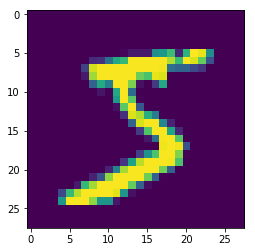

In [4]:
# Picture in postion 0
plt.imshow(x_train[0])
plt.show()

 <font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS"> Additionally, let's check what the human rater interpreted the number as.</font>


In [5]:
# Label for the picture in postion 0
print(y_train[0])

5


<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">Looks about right, wouldn't you agree?</font>

<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Preparing the training process</h3>

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">To make training a bit easier and enhance accuracy, we normalize train and test data from a scale of <font size="2" style="color: rgb(41,186,116)" face="Trebuchet MS">0...255</font> (grayscale values) to <font size="2" style="color: rgb(41,186,116)" face="Trebuchet MS">0...1</font>.</font>


In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Constructing the neural network</h3>

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">Now we come to the intresting part; building the model. We are choosing the model type and the size of the input layer, in this case equal to the number of input features (784 pixels = 784 neurons).


There are a lot of details here, but don't worry, you are not required to understand every aspect of it. For the nerds among us: We are building a sequential model, meaning that we do not allow for backwards propagation. Also, we flatten the input layer, because we have no multidimensional data to process. </font>

In [7]:
# Choose a model type
model = tf.keras.models.Sequential()
# Add the input layer
model.add(tf.keras.layers.Flatten())

<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Recap: Neural network structure</h3>
<br clear="all" />
<img src="img/network.png" alt="Drawing" style="width: 400px;" align="left"/> 

<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Network depth</h3>

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">Now it is time to add some hidden layers to our network. 
Decide how many layers you deem appropriate for the task at hand.</font>

> <font size="2" style="color: rgb(231,28,87)" face="Trebuchet MS">Your input is required! Choose the number of hidden layers for your network. For performance reasons, the number should be between 1 and 8.</font>

In [8]:
# adjust the network depth
%run scripts/network_depth.py
depth = query_network_depth()
display(depth)

IntSlider(value=2, description='Network depth:', max=8, min=1, style=SliderStyle(description_width='initial'))

<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Layer width</h3>

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">Next, you need to configure the number of neurons per hidden layer.
Decide how many neurons you deem appropriate for each of the hidden layers you constructed.</font>

> <font size="2" style="color: rgb(231,28,87)" face="Trebuchet MS">Your input is required! Choose the number of neurons for each layer.</font>

In [9]:
# adjust the network depth
%run scripts/layer_width.py
layer_width = query_layer_width(depth)
for widget in layer_width:
    display(widget)

IntSlider(value=2, description='Width Layer 1:', max=8, min=1, style=SliderStyle(description_width='initial'))

IntSlider(value=2, description='Width Layer 2:', max=8, min=1, style=SliderStyle(description_width='initial'))

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">The code below will add the number of layers you assigned to the network. 
Our network will employ dense layers, meaning that every neuron on a given layer is connected to all neurons on the previous layer and utilize a ReLu activation function. </font>

In [10]:
# Add the number of hidden layers choosen and XXX
for x in layer_width:
    model.add(tf.keras.layers.Dense(x.value, activation=tf.nn.relu))


<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">Last but not least we are missing an output layer. Remember, this is classification problem. Our possible classification outputs are the numbers 0...9; so ten outputs. 

Therefore, our output layer requires 10 outputs as well!</font>

In [11]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">We are finaly ready to compile the model.</font>

In [12]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Training the model</h3>

<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">Remember what you learned today; the training of neural networks is the adjustment of weights on connections between links. We are missing one last parameter: In how many iterations (epochs) would you like to train the model? 
(Be sensible about the number of epochs, models that have not finished training by the end of this session will not be included in the competition!)</font>

> <font size="2" style="color: rgb(231,28,87)" face="Trebuchet MS">Your input is required! Choose the number of epochs for training your model!</font>

In [13]:
# adjust the number of training epochs
%run scripts/training_epochs.py
epochs = query_training_epochs()
display(epochs)

IntSlider(value=3, description='Training epochs:', min=1, style=SliderStyle(description_width='initial'))

In [14]:
# train the model
history = model.fit(x_train, y_train, epochs=epochs.value)

Epoch 1/3
60000/60000 [==============================] - 3s 52us/step - loss: 2.3016 - acc: 0.1120
Epoch 2/3
60000/60000 [==============================] - 3s 46us/step - loss: 2.3013 - acc: 0.1124
Epoch 3/3
60000/60000 [==============================] - 3s 47us/step - loss: 2.3013 - acc: 0.1124


<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">All done! Let's visualize how the training went. </font>

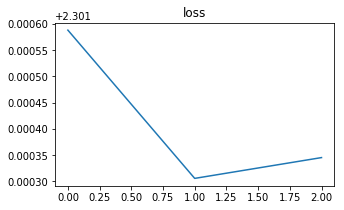

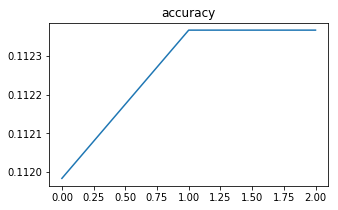

In [15]:
# visulize training loss
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

# visualize training accuracy
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Wrapping up</h3>
<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">
No more hiding! The next step scores your model. Classical measures for model performance are accuracy and loss. We'll use those along with the number of epochs you choose for training. 

Roughly speaking, the following rules apply:
<ul>
  <li>The <font size="2" style="color: rgb(41,186,116)" face="Trebuchet MS">higher</font> your model accuracy, the better your model scores.</li>
  <li>The <font size="2" style="color: rgb(41,186,116)" face="Trebuchet MS">lower</font> the loss, the better your model scores. </li>
  <li>The <font size="2" style="color: rgb(41,186,116)" face="Trebuchet MS">lower</font> the number of epochs configured, the better your model scores.</li>
</ul>
</font>

In [16]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Your model achieved a loss score of {}'.format(val_loss))
print('Your model had an accuracy of {}%'.format(val_acc))
print('Your model was trained in {} epochs'.format(epochs.value))

10000/10000 [==============================] - 0s 30us/step
Your model achieved a loss score of 2.301064446258545
Your model had an accuracy of 0.1135%
Your model was trained in 3 epochs


<h3 style="color: rgb(41,186,116)" face="Trebuchet MS">Closing notes</h3>
<font size="2" style="color: rgb(87,87,87)" face="Trebuchet MS">
For those interested in what the model did wrong; the following code will show you a draw of 100 numbers where your model went wrong</font>

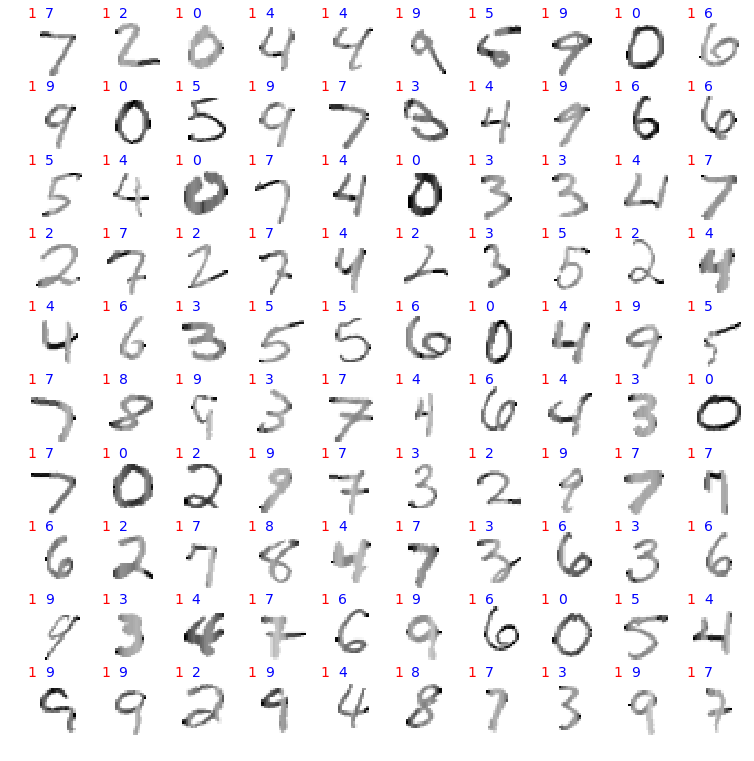

In [17]:
results = model.predict_classes(x_test)

test_wrong = [im for im in zip(x_test,results,y_test) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    
    # True label
    plt.text(0, 0, val[1], fontsize=14, color='red')
    
    # Estimated label
    plt.text(8, 0, val[2], fontsize=14, color='blue')
    plt.imshow(im, cmap='gray')